In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


The two folders folders_norm and forlders_abnorm contain the paths to the 6 normal imu data and 6 abnormal imu data.

In [0]:
folders_norm=["/content/drive/My Drive/SP CUP 2020/SP Cup/01_Initial_dataset_with_no_abnormalities/_slash_mavros_slash_imu_slash_data.csv","/content/drive/My Drive/SP CUP 2020/SP Cup/03_Dataset with 5 normal experiments_17Jan2020/2020-01-17-11-32-12/_slash_mavros_slash_imu_slash_data.csv","/content/drive/My Drive/SP CUP 2020/SP Cup/03_Dataset with 5 normal experiments_17Jan2020/2020-01-17-11-32-49/_slash_mavros_slash_imu_slash_data.csv","/content/drive/My Drive/SP CUP 2020/SP Cup/03_Dataset with 5 normal experiments_17Jan2020/2020-01-17-11-33-26/_slash_mavros_slash_imu_slash_data.csv","/content/drive/My Drive/SP CUP 2020/SP Cup/03_Dataset with 5 normal experiments_17Jan2020/2020-01-17-11-34-08/_slash_mavros_slash_imu_slash_data.csv","/content/drive/My Drive/SP CUP 2020/SP Cup/03_Dataset with 5 normal experiments_17Jan2020/2020-01-17-11-34-43/_slash_mavros_slash_imu_slash_data.csv"]
folders_abnorm=["/content/drive/My Drive/SP CUP 2020/SP Cup/02_Initial_dataset_with_abnormalities/_slash_mavros_slash_imu_slash_data.csv","/content/drive/My Drive/SP CUP 2020/SP Cup/04_Dataset with 5 abnormal experiments_17Jan2020/2020-01-17-11-35-27/_slash_mavros_slash_imu_slash_data.csv","/content/drive/My Drive/SP CUP 2020/SP Cup/04_Dataset with 5 abnormal experiments_17Jan2020/2020-01-17-11-36-03/_slash_mavros_slash_imu_slash_data.csv","/content/drive/My Drive/SP CUP 2020/SP Cup/04_Dataset with 5 abnormal experiments_17Jan2020/2020-01-17-11-36-43/_slash_mavros_slash_imu_slash_data.csv","/content/drive/My Drive/SP CUP 2020/SP Cup/04_Dataset with 5 abnormal experiments_17Jan2020/2020-01-17-11-37-25/_slash_mavros_slash_imu_slash_data.csv","/content/drive/My Drive/SP CUP 2020/SP Cup/04_Dataset with 5 abnormal experiments_17Jan2020/2020-01-17-11-38-07/_slash_mavros_slash_imu_slash_data.csv"]

### IMPORTS

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.layers import Input, Dense
from sklearn.externals import joblib
from keras.models import Sequential;
from keras.layers import Dense;
from keras.layers import LSTM;
from keras.layers import RepeatVector;
from keras.layers import TimeDistributed;
from keras.models import load_model;
from keras.layers import SimpleRNN
from keras.layers import GRU
from sklearn.preprocessing import MinMaxScaler
from keras.utils import plot_model


## Normal IMU data

In [0]:
imu_norm_6 = pd.DataFrame()
for num in [1,2,3,4]:
    data_dir = folders_norm[num]
    df=pd.read_csv(data_dir)

    for i in range(len(df)):
       
        xa=df["x.1"][i]
        ya=df["y.1"][i]
        za=df["z.1"][i]
        xl=df["x.2"][i]
        yl=df["y.2"][i]
        zl=df["z.2"][i]-10
        
        imu=np.array([xa,ya,za,xl,yl,zl])
        imu_df=pd.DataFrame(imu.reshape(1,len(imu)))
        imu_df.index=[str(i)]
        imu_norm_6=imu_norm_6.append(imu_df)
        
imu_norm_6.columns=["XA","YA","ZA","XL","YL","ZL"]


imu_abnorm_6 = pd.DataFrame()
for num in [1,2,3,4]:

    #num=0#############################################################################################################
    data_dir_ab = folders_abnorm[num]
    df_ab=pd.read_csv(data_dir)
    for i in range(len(df)):
        xa_ab=df_ab["x.1"][i]
        ya_ab=df_ab["y.1"][i]
        za_ab=df_ab["z.1"][i]
        xl_ab=df_ab["x.2"][i]
        yl_ab=df_ab["y.2"][i]
        zl_ab=df_ab["z.2"][i]-10
        
        imu_ab=np.array([xa_ab,ya_ab,za_ab,xl_ab,yl_ab,zl_ab])
        imu_df_ab=pd.DataFrame(imu_ab.reshape(1,len(imu)))
        imu_df_ab.index=[str(i)]
        imu_abnorm_6=imu_abnorm_6.append(imu_df_ab)
        
imu_abnorm_6.columns=["XA_ab","YA_ab","ZA_ab","XL_ab","YL_ab","ZL_ab"]


In [0]:
imu_norm_6.shape

(551, 6)

In [0]:
scaler=MinMaxScaler(feature_range=(-1, 1))
scaler.fit(imu_norm_6)
imu_norm_6_s=pd.DataFrame(scaler.transform(imu_norm_6))
imu_abnorm_6_s=pd.DataFrame(scaler.transform(imu_abnorm_6))

In [0]:
imu_norm_6_s.head()

,0,1,2,3,4,5
0,0.251706,0.029385,0.181397,-0.070524,0.400000,-0.217910
1,0.132675,0.038066,0.159944,0.066908,0.357692,-0.379104
2,0.221738,-0.012623,0.151153,-0.034358,0.238462,-0.271642
3,0.317750,-0.027461,0.141116,-0.030741,0.300000,-0.289552
4,0.270320,0.123902,0.220013,0.070524,0.438462,-0.432836


#Dataset Preparation and Model Building

In [0]:
z=np.array(imu_norm_6_s)
look_back=3
x_train=[]
y_train=[]

for i in range(len(z)-look_back):
    temp=[]
    for j in range(look_back):
        temp.append(z[i+j])
    x_train.append(temp)
    y_train.append(z[i+look_back])
x_train=np.array(x_train)
y_train=np.array(y_train)
y_train=y_train.reshape(len(y_train),6)

print("x_train: ",x_train.shape)
print("y_train: ",y_train.shape)


time_step=look_back
n_features=6

x_train:  (548, 3, 6)
y_train:  (548, 6)


In [0]:
from keras.models import Model
#import keras.optimizers.adam as a
n_input=6
n_units=64
n_output=6
encoder_inputs = Input(shape=(time_step, n_input))
encoder = LSTM(n_units, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)
encoder_states = [state_h, state_c]
# define training decoder
decoder_inputs = Input(shape=(1,n_output))
decoder_lstm = LSTM(n_units, return_sequences=True)
decoder_outputs = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = Dense(n_output, activation='tanh')
decoder_outputs = decoder_dense(decoder_outputs)
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer="adam",loss="mse",metrics=["accuracy"])
model.summary()
x_train2=np.zeros((x_train.shape[0],1,n_features))
print(x_train.shape)
y_train=y_train.reshape(y_train.shape[0],1,n_features)
print(y_train.shape)
print(x_train.shape)
print(x_train2.shape)
print(y_train.shape)


# model.fit([x_train,x_train2],y_train,epochs=200)
# model.save("/content/drive/My Drive/SP CUP 2020/SP Cup/models/forecasting_model/Submission_encoder_decoder_RNN_forecasting_3_timesteps_scale_change.hdf5")



Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 3, 6)         0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 1, 6)         0                                            
__________________________________________________________________________________________________
lstm_3 (LSTM)                   [(None, 64), (None,  18176       input_3[0][0]                    
__________________________________________________________________________________________________
lstm_4 (LSTM)                   (None, 1, 64)        18176       input_4[0][0]                    
                                                                 lstm_3[0][1]               

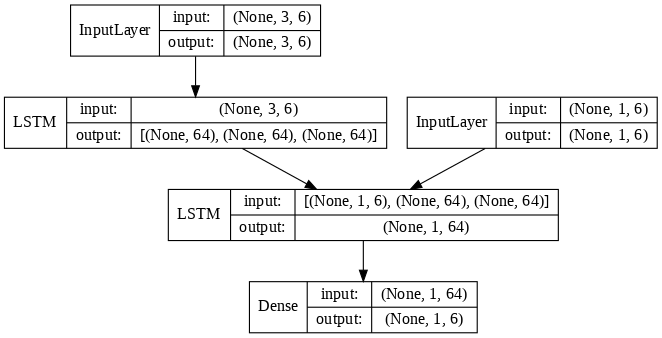

In [0]:
model=load_model("/content/drive/My Drive/SP CUP 2020/SP Cup/models/forecasting_model/Submission_encoder_decoder_RNN_forecasting_3_timesteps_scale_change.hdf5")
plot_model(model, to_file='Submission_encoder_decoder_RNN_forecasting_3_timesteps.png', show_shapes=True,show_layer_names=False,dpi=80)

In [0]:
(0.00374621 + 0.00026913 + 0.03397369)/3

0.01266301

In [0]:

x_t= pd.DataFrame()
for num in [0]:

    #num=0#############################################################################################################
    data_dir = folders_norm[num]
    df=pd.read_csv(data_dir)

    for i in range(len(df)):
       
        xa=df["x.1"][i]
        ya=df["y.1"][i]
        za=df["z.1"][i]
        xl=df["x.2"][i]
        yl=df["y.2"][i]
        zl=df["z.2"][i]-10
        
        imu=np.array([xa,ya,za,xl,yl,zl])
        imu_df=pd.DataFrame(imu.reshape(1,len(imu)))
        imu_df.index=[str(i)]
        x_t=x_t.append(imu_df)
      
x_t.columns=["XA","YA","ZA","XL","YL","ZL"]
x_t_s=pd.DataFrame(scaler.transform(x_t))

x_t.describe()
z=np.array(x_t_s)
look_back=3
x_test=[]
y_test=[]

for i in range(len(z)-look_back):
    temp=[]
    for j in range(look_back):
        temp.append(z[i+j])
    x_test.append(temp)
    y_test.append(z[i+look_back])
  
x_test=np.array(x_test)
y_test=np.array(y_test)

x_test2=np.zeros((x_test.shape[0],1,n_features))
print("x_test: ",x_test.shape)
print("y_test: ",y_test.shape)

x_pred = model.predict([x_test,x_test2])

# print(x_pred[0][0]-y_test[0])
a_error=[]
l_error=[]
for i in range(len(x_test)):
    error_vector=np.abs(x_pred[i][0]-y_test[i])
    a=np.mean(error_vector[:3],axis=0)
    l=np.mean(error_vector[3:],axis=0)

    a_error.append(a)
    l_error.append(l)
    # print(error_vector,a,l)
a_error=np.array(a_error)
l_error=np.array(l_error)
   

print("a_error ",a_error.shape)
# 
print("l_error ",l_error.shape)

x_test:  (299, 3, 6)
y_test:  (299, 6)
a_error  (299,)
l_error  (299,)


## THRESHOLD

In [0]:

import io
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt

def get_best_distribution(data):
    dist_names = ["norm", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme","beta","betaprime","bradford","burr","burr12","cauchy","chi","chi2","cosine","dgamma","alpha",
                  "dweibull","erlang","expon","exponweib","exponpow","fatiguelife","fisk",
                  "cauchy","foldnorm","f","genlogistic","gamma","genpareto","genexpon","genextreme",
                  "gengamma","genhalflogistic","gennorm","gilbrat","gompertz","gumbel_r",
                  "gumbel_l","halfcauchy","halfnorm","halflogistic","hypsecant","gausshyper","invgamma","invgauss",
                  "invweibull","johnsonsb","ksone","kstwobign","levy_l",
                  "levy","loglaplace","loggamma","lognorm","maxwell","mielke",
                  "nakagami","ncx2","pareto","lomax","powernorm",
                  "powerlaw","rdist","rayleigh","rice","recipinvgauss","semicircular",
                  "t","trapz","triang","truncexpon","truncnorm",
                  "tukeylambda","vonmises","uniform","wald","weibull_max","weibull_min","logistic","norminvgauss"]#,"johnsonsu"

    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(stats, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = stats.kstest(data, dist_name, args=param)
        #print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

%matplotlib inline


matplotlib.rcParams['figure.figsize'] = (16.0, 14.0)
matplotlib.style.use('ggplot')
def Plot(data,dist):
    



    bins = 100
    size = 16384
    DISTRIBUTIONS = [dist]
    plotData = []
    for distribution in DISTRIBUTIONS:
        # Create random data
        rv = pd.Series(data)
        # Get sane start and end points of distribution
        start = distribution.ppf(0)
        end = distribution.ppf(0.99)

        # Build PDF and turn into pandas Series
        x = np.linspace(start, end, size)
        y = distribution.pdf(x)
        pdf = pd.Series(y, x)

        # Get histogram of random data
        b = np.linspace(start, end, bins+1)
        y, x = np.histogram(rv, bins=b, normed=True)
        x = [(a+x[i+1])/2.0 for i,a in enumerate(x[0:-1])]
        hist = pd.Series(y, x)

        # Create distribution name and parameter string
        title = '{}({})'.format(distribution.dist.name, ', '.join(['{}={:0.2f}'.format(k,v) for k,v in distribution.kwds.items()]))

        # Store data for later
        plotData.append({
        'pdf': pdf,
        'hist': hist,
        'title': title
        })


        plotMax = len(plotData)

    for i, data in enumerate(plotData):
        w = abs(abs(data['hist'].index[0]) - abs(data['hist'].index[1]))

        # Display
        plt.figure(figsize=(10, 6))
        ax = data['pdf'].plot(kind='line', label='Model PDF', legend=True, lw=2)
        ax.bar(data['hist'].index, data['hist'].values, label='Random Sample', width=w, align='center', alpha=0.5)
        ax.set_title(data['title'])
        plt.savefig("lin_acceleration_reconstruction_error")



In [0]:
d=l_error
get_best_distribution(d)####################################################################################################################


/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:708: RuntimeWarning: divide by zero encountered in true_divide
  a/(b-1.0),
/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:712: RuntimeWarning: divide by zero encountered in true_divide
  a*(a+1.0)/((b-2.0)*(b-1.0)),
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1063: RuntimeWarning

Best fitting distribution: norminvgauss
Best p value: 0.002341783668469706
Parameters for the best fit: (2.7628773472187795, 2.6921416517143113, 0.020159684347297417, 0.011616590734185604)


('norminvgauss',
 0.002341783668469706,
 (2.7628773472187795,
  2.6921416517143113,
  0.020159684347297417,
  0.011616590734185604))

/usr/local/lib/python3.6/dist-packages/numpy/core/function_base.py:153: RuntimeWarning: invalid value encountered in multiply
  y *= step
/usr/local/lib/python3.6/dist-packages/numpy/core/function_base.py:163: RuntimeWarning: invalid value encountered in add
  y += start
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:433: RuntimeWarning: invalid value encountered in greater
  if np.any(bin_edges[:-1] > bin_edges[1:]):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:72: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass functi

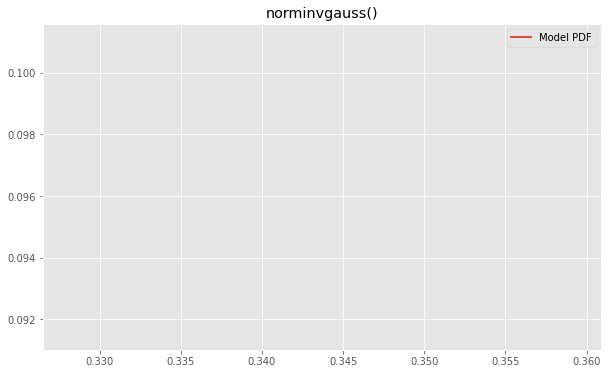

In [0]:
valid = stats.norminvgauss(2.7628773472187795,
  2.6921416517143113,
  0.020159684347297417,
  0.011616590734185604)
Plot(d,valid)

In [0]:
threshold=valid.ppf(0.95)
print(threshold)

0.19198187409792797


In [0]:
tang=0.17089532800671378
tlin=0.11828488174479039

In [0]:
tang=0.3501525484736499
tlin=0.19198187409792797

## GROUND TRUTH

In [0]:
Truthl=[[None],[None],[None],[None],[None],[None]]
Truthl[0]=['A', 'A', 'A', 'A', 'A','N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N','N', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A','A', 'A', 'A', 'A', 'A', 'A', 'A']
Truthl[1]=['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'A',
       'N', 'A', 'A', 'A', 'N', 'A', 'A', 'N', 'N', 'A', 'N', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'N', 'N', 'N', 'A', 'A', 'A', 'N',
       'N', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'N', 'A', 'A', 'N', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'N', 'A', 'A', 'A', 'N', 'N', 'N', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'N', 'A', 'N', 'A', 'N', 'A', 'A', 'A', 'A', 'A', 'N']
Truthl[2]=['N', 'N', 'N', 'N', 'N', 'A', 'N', 'A', 'A', 'A', 'N', 'A', 'A',
       'A', 'A', 'A', 'A', 'N', 'N', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'N', 'N', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'N',
       'N', 'N', 'N', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'N', 'N', 'N',
       'N', 'A', 'A', 'A', 'N', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'N', 'N', 'N', 'N',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'N',
       'N', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'N', 'N', 'A', 'A', 'A', 'A', 'A', 'A', 'N', 'N', 'N', 'N', 'N',
       'N']
Truthl[3]=['N', 'A', 'A', 'A', 'A', 'N', 'N', 'N', 'A', 'A', 'A', 'A', 'N',
       'A', 'A', 'A', 'N', 'N', 'A', 'A', 'N', 'N', 'N', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'N', 'A',
       'A', 'A', 'A', 'A', 'A', 'N', 'A', 'A', 'A', 'A', 'N', 'N', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'N', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'N', 'A', 'A', 'A',
       'A', 'N', 'N', 'A', 'A', 'A', 'A', 'A', 'N', 'A', 'A', 'A', 'N',
       'A', 'A', 'A', 'N', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N']
Truthl[4]=['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'A', 'N', 'N',
       'A', 'A', 'A', 'A', 'N', 'N', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'N', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A']
Truthl[5]=['N', 'N', 'N', 'N', 'N', 'N', 'A', 'A', 'A', 'A', 'A', 'A', 'N',
       'N', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'N', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'N', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'N',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'N', 'N', 'N', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A']


## GROUND TRUTH FOR ANGULAR VELOCTY



In [0]:
Trutha=[[None],[None],[None],[None],[None],[None]]
Trutha[0]=['A', 'A', 'A', 'A', 'A','N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'N', 'N', 'A', 'A', 'A', 'A']
Trutha[1]=['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'A', 'A',
       'A', 'A', 'N', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'N', 'N', 'A', 'A', 'A', 'A', 'A', 'A', 'N', 'N', 'A', 'A',
       'A', 'A', 'A', 'N', 'N', 'N', 'A', 'N', 'N', 'N', 'N', 'N', 'A',
       'N', 'N', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'N', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'N', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'N', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'N', 'A', 'N', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'N', 'N', 'A', 'A', 'A', 'A', 'A', 'A', 'A']
Trutha[2]=['N', 'N', 'N', 'N', 'N', 'N', 'N', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'N', 'A', 'A', 'A', 'A', 'A', 'A',
       'N', 'A', 'N', 'N', 'N', 'N', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'N', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'N', 'A', 'A', 'A', 'A', 'A', 'A', 'N',
       'N', 'A', 'A', 'A', 'A', 'A', 'N', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'N', 'A', 'N', 'N', 'N',
       'N', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'N', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'N', 'A', 'N',
       'N']

Trutha[3]=['A', 'A', 'N', 'A', 'A', 'A', 'A', 'A', 'A', 'N', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'N', 'N', 'N', 'N', 'N', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'N', 'N', 'N', 'N', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'N', 'N', 'A', 'A', 'A', 'A', 'N', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'N', 'N', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'N', 'N', 'N', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'N', 'N', 'N', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N']
Trutha[4]=['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'N', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'N', 'A', 'A', 'N', 'N', 'A', 'A', 'N', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'N', 'N', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'N', 'N', 'A', 'A', 'A', 'A', 'A', 'A', 'N', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'N', 'A', 'N', 'N',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'N', 'N', 'A', 'N', 'A',
       'N', 'N', 'N', 'N', 'N', 'N']
 
Trutha[5]=['N', 'N', 'N', 'N', 'N', 'N', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'N', 'N', 'N', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'N', 'N', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'N', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'N', 'N', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'N', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'N', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'N', 'N', 'N', 'A', 'A', 'A', 'N',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'N']

Testing on Normal Data


In [0]:
imu_norm_test = pd.DataFrame()
for num in [5]:
    data_dir = folders_norm[num]
    df=pd.read_csv(data_dir)
    imu_norm_test=df[["x.1","y.1","z.1","x.2","y.2","z.2"]]
    imu_norm_test["z.2"]=imu_norm_test["z.2"] -10
    imu_norm_test.columns=["XA","YA","ZA","XL","YL","ZL"]
    # print(imu_norm_test)
   
ab=scaler.transform(imu_norm_test)
imu_norm_test_s=pd.DataFrame(ab,columns=["XA","YA","ZA","XL","YL","ZL"])
zt=np.array(imu_norm_test_s)

x_test=[]
y_test=[]

for i in range(len(zt)-look_back):
    temp=[]
    for j in range(look_back):
        temp.append(zt[i+j])
    x_test.append(temp)
    y_test.append(zt[i+look_back])
x_test=np.array(x_test)
y_test=np.array(y_test)
print(x_test.shape)
print(y_test.shape)
x_test2=np.zeros((x_test.shape[0],1,n_features))
error_count=0
total_count=len(x_test)

temp=x_test[0].reshape(1,time_step,n_features)
temp2=x_test2[0].reshape(1,1,n_features)
pred=model.predict([temp,temp2])
# print(pred[0][0]-y_test[0])    


for i in range(len(x_test)):
    temp=x_test[i].reshape(1,time_step,n_features)
    temp2=x_test2[i].reshape(1,1,n_features)
    pred=model.predict([temp,temp2])
    
    error_vector=np.abs(pred[0][0]-y_test[i])
    a=np.mean(error_vector[:3],axis=0)
    l=np.mean(error_vector[3:],axis=0)
    # print(error_vector)
    # print(l)
    if a>tang or l>=tlin:
        # print("yes")
        error_count=error_count+1
# print(tang,tlin)
print("recall",(total_count-error_count)/total_count)
    

(139, 3, 6)
(139, 6)
recall 0.8561151079136691


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


##Model Evaluation


##Testing the scores on the abnormal data

In [0]:
imu_abnorm_test = pd.DataFrame()
for numb in [5]:
    truthl=Truthl[numb]
    trutha=Trutha[numb]
    data_dir_ab = folders_abnorm[numb]
    df_ab=pd.read_csv(data_dir_ab)
    imu_abnorm_test=df_ab[["x.1","y.1","z.1","x.2","y.2","z.2"]]
    imu_abnorm_test["z.2"]=imu_abnorm_test["z.2"] -10
    imu_abnorm_test.columns=["XA","YA","ZA","XL","YL","ZL"]
    # print(imu_norm_test)
# print(tang,tlin)  
ab=scaler.transform(imu_abnorm_test)
imu_abnorm_test_s=pd.DataFrame(ab,columns=["XA","YA","ZA","XL","YL","ZL"])
zt_ab=np.array(imu_abnorm_test_s)
print(zt_ab.shape)

x_test_ab=[]
y_test_ab=[]

for i in range(len(zt_ab)-look_back):
    print(i)
    temp=[]
    for j in range(look_back):
        temp.append(zt_ab[i+j])
    x_test_ab.append(temp)
    y_test_ab.append(zt_ab[i+look_back])

y_test_ab=np.array(y_test_ab)
x_test_ab=np.array(x_test_ab)
x_test2_ab=np.zeros((x_test_ab.shape[0],1,n_features))
print(x_test_ab.shape)
print(y_test_ab.shape)

tp=0
tn=0
fp=0
fn=0

for i in range(len(x_test_ab)):
    temp=x_test_ab[i].reshape(1,time_step,n_features)
    temp2=x_test2_ab[i].reshape(1,1,n_features)
    pred=model.predict([temp,temp2])
    
    error_vector=np.abs(pred[0][0]-y_test_ab[i])
    a=np.mean(error_vector[:3],axis=0)
    l=np.mean(error_vector[3:],axis=0)
    # print(a,l)
#     # print(a,l,trutha[2+i],truthl[2+i])
    if (l>=tlin or a>=tang) and (truthl[2+i]=="A" or trutha[2+i]=="A"):
        tp+=1
            
    if (l>=tlin or a>=tang) and (truthl[2+i]=="N" and trutha[2+i]=="N"):
        fp+=1
    if (l<=tlin and a<=tang) and (truthl[2+i]=="A" or trutha[2+i]=="A") :
        fn+=1
        # print(a,l,trutha[2+i],truthl[2+i])
    if (l<=tlin and a<=tang) and (truthl[2+i]=="N" and truthl[2+i]=="N") :
        tn+=1
# print("tp: ",tp,"\n","fp: ",fp,"\n","tn: ",tn,"\n","fn: ",fn)
  
precision=round(tp/(tp+fp),2) 
recall= round(tp/(tp+fn),2)
F1_score= round((2*precision*recall)/(precision+recall),2)

print('Precision: ',precision)
# # 
print('Recall: ',recall)

print('F1_Score: ',F1_score)


(157, 6)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
(154, 3, 6)
(154, 6)
Precision:  0.99
Recall:  1.0
F1_Score:  0.99


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
x_train2=np.array(x_train2)#[0].shape

In [0]:
for numb in [5]:

    #numb=5
    truth1= Truth[numb]

    data_dir_ab = folders_abnorm[numb]
    df_ab=pd.read_csv(data_dir_ab)
    linear_acceleration_ab = pd.DataFrame()
    for i in range(len(df_ab)):
        x=df_ab["x.2"][i]
        y=df_ab["y.2"][i]
        z=df_ab["z.2"][i]-10
        la=np.array([x,y,z])
        la_df=pd.DataFrame(la.reshape(1,3))
        la_df.index=[str(i)]
        linear_acceleration_ab=linear_acceleration_ab.append(la_df)
        
    linear_acceleration_ab.columns=["X","Y","Z"]
    ab=scaler.transform(linear_acceleration_ab)
    linear_acceleration_s_ab=pd.DataFrame(ab,columns=["X","Y","Z"])
    z2=np.array(linear_acceleration_s_ab)

    x_test=[]
    y_test=[]

    for i in range(len(z2)-look_back):
        temp=[]
        for j in range(look_back):
            temp.append(z2[i+j])
        x_test.append(temp)
        y_test.append(z2[i+look_back])
    x_test=np.array(x_test)
    y_test=np.array(y_test)
    y_test=y_test.reshape(len(y_test),3)
    # x_test2=np.zeros((x_test2.shape[0],1,n_features))
    # x_test=x_test.reshape(x_test.shape[0],1,n_features)
    #print("x_test: ",x_test.shape)
    #print("y_test: ",y_test.shape)
    #import seaborn as sns
    predictions=[]
    final_error=[]
    for i in range(len(x_test)):
        # print(x_test[i])
        x2 = model.predict([x_test[i].reshape(1,look_back,3),x_train2[i].reshape(1,1,3)])
        #x2 = model.predict(x_test[i].reshape(1,look_back,3))
        # print(x2[0][0])
        predictions.append(x2)
        t=y_test[i]
        # print(t)
        error=np.mean(np.abs(x2[0][0]-t))
        # print(error)
        final_error.append(error)
    final_error=np.array(final_error)
    #sns.distplot(final_error, bins =30, kde= True, color = 'green');
    predictions=np.array(predictions)
    predictions=predictions.reshape(len(predictions),3)
    #plt.plot(predictions)
    #print(model.evaluate(x_test,y_test))

    check=[]
    tp=0
    tn=0
    fp=0
    fn=0
    for i in range(len(linear_acceleration_s_ab)-look_back):
        if final_error[i]>threshold and truth1[look_back+i]=="A" :
            tp+=1
            
        if final_error[i]>threshold and truth1[look_back+i]=="N" :
            fp+=1
        if final_error[i]<=threshold and truth1[look_back+i]=="A" :
            fn+=1
        if final_error[i]<=threshold and truth1[look_back+i]=="N" :
            tn+=1
        if final_error[i]>threshold:
            check.append("A")
        if final_error[i]<=threshold:
            check.append("N")

    precision=round(tp/(tp+fp),2) 
    recall= round(tp/(tp+fn),2)
    F1_score= round((2*precision*recall)/(precision+recall),2)
    PREC.append(precision)
    REC.append(recall)
    F1.append(F1_score)

    check=np.array(check)
    #print(check.shape)
print('Precision: ',PREC)

print('Recall: ',REC)

print('F1_Score: ',F1)
p=np.mean(PREC)
r=np.mean(REC)
f=np.mean(F1)
print('Precision: ',round(p,2))
print('Recall: ',round(r,2))
print('F1_Score: ',round(f,2))

Precision:  [0.95, 0.85, 0.86, 0.86, 0.97, 0.95, 0.95]
Recall:  [0.95, 0.9, 0.97, 0.92, 0.98, 0.99, 0.99]
F1_Score:  [0.95, 0.87, 0.91, 0.89, 0.97, 0.97, 0.97]
Precision:  0.91
Recall:  0.96
F1_Score:  0.93
